# Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# 1. Importing necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score, roc_curve

from pickle import dump

import warnings
warnings.filterwarnings('ignore')

In [2]:
from imblearn.over_sampling import SMOTE   # SMOTE technique in handling imbalanced data

# 2. Load dataset 

In [9]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# 3. Data Understanding

In [4]:
fraud_data.shape

(600, 6)

In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

# 4. Data Preprocessing

In [11]:
le=LabelEncoder()
fraud_data['Undergrad']=le.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status']=le.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban']=le.fit_transform(fraud_data['Urban'])

fraud_data['Taxable.Income']=[1 if i<=30000 else 0 for i in fraud_data['Taxable.Income']]

In [19]:
fraud_data.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
306,1,0,0,185099,12,0
93,1,1,1,137676,3,1
564,1,1,0,30098,11,1
436,0,0,0,158057,4,1
122,1,1,1,140762,26,0


In [16]:
fraud_data.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

# 5. Handling Imbalanced Data

In [20]:
X=fraud_data.drop('Taxable.Income',axis=1)
y=fraud_data[['Taxable.Income']]

In [22]:
y.value_counts()

Taxable.Income
0                 476
1                 124
dtype: int64

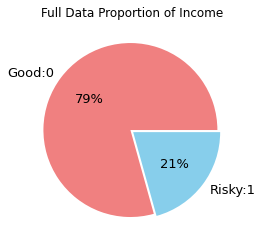

In [32]:
plt.pie(x=y.value_counts(),labels=['Good:0','Risky:1'], autopct='%1.0f%%',textprops={'fontsize':13}, colors=['lightcoral','skyblue'], explode=[0.02,0.02])
plt.title('Full Data Proportion of Income')
plt.show()

## Using SMOTE

In [28]:
smote=SMOTE(random_state=10)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [38]:
y_resampled.value_counts()

Taxable.Income
0                 476
1                 476
dtype: int64

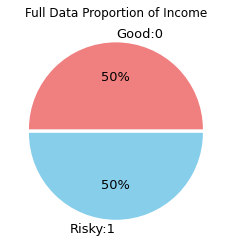

In [33]:
plt.pie(x=y_resampled.value_counts(),labels=['Good:0','Risky:1'], autopct='%1.0f%%',textprops={'fontsize':13}, colors=['lightcoral','skyblue'], explode=[0.02,0.02])
plt.title('Full Data Proportion of Income')
plt.show()

## Data is Balanced now for Model Training 

In [39]:
fraud_data_balanced = pd.concat([X_resampled,y_resampled],axis=1)

In [54]:
fraud_data_balanced

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
947,1,0,77033,17,1,1
948,1,0,76059,17,1,1
949,1,1,163708,25,0,1
950,0,0,82077,8,0,1


# 6. Model Building

In [178]:
X=fraud_data_balanced.drop('Taxable.Income',axis=1)
y=fraud_data_balanced[['Taxable.Income']]

In [179]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

# 7. Model Training

In [265]:
rf_model=RandomForestClassifier(n_estimators=1000,
    criterion='gini',
    max_depth=5,
    bootstrap=True,
    random_state=10)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=10)

# 7. Model Testing

In [266]:
y_train_pred=rf_model.predict(X_train)

In [267]:
y_test_pred=rf_model.predict(X_test)

# 8. Model Evaluation

In [268]:
print(confusion_matrix(y_train,y_train_pred))

[[270  99]
 [ 56 336]]


In [269]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       369
           1       0.77      0.86      0.81       392

    accuracy                           0.80       761
   macro avg       0.80      0.79      0.79       761
weighted avg       0.80      0.80      0.80       761



In [270]:
print(accuracy_score(y_test,y_test_pred))

0.6492146596858639


In [271]:
y_train_pred_score=rf_model.predict_proba(X_train)
y_test_pred_score=rf_model.predict_proba(X_test)

AUC  : 0.7412105028927459


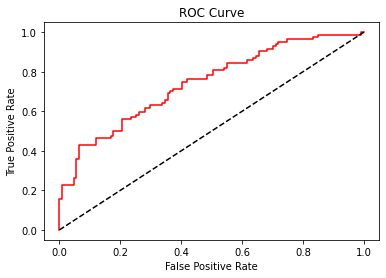

In [272]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred_score[:,1])  # roc_curve(y_true,y_score--probability)-> score implies prob

auc = roc_auc_score(y_test,y_test_pred_score[:,1])
print('AUC  :',auc)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')  #range on x and y axes
plt.xlabel('False Positive Rate') # or [1 - True Negative Rate]
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 9. Model Deployment

In [273]:
dump(rf_model,open('fraud_check_intelligence_rf.pkl','wb'))